In [ ]:
#установка библиотек
# !pip install psycopg2
# !pip install plotly

In [1]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
#Библиотека ждя визуализации
from IPython.display import HTML
import plotly.express as px


#!введите свои реквизиты!
DB_HOST = '52.157.159.24'
DB_USER = 'student20'
DB_USER_PASSWORD = 'student20_password'
DB_NAME = 'sql_ex_for_student20'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
#join по таблицам laptop & product
request = """
SELECT avg(price), maker
from 
(
SELECT price, maker
FROM laptop l 
join product p on l.model = p.model
union all

SELECT price, maker
FROM pc l 
join product p on l.model = p.model
union all 

SELECT price, maker
FROM printer l 
join product p on l.model = p.model
) a
group by maker
order by avg 
"""
df = pd.read_sql_query(request, conn)
fig = px.bar(x=df.maker.to_list(), y=df.avg.to_list(), labels={'x':'maker', 'y':'avg price'})
fig.show()

In [ ]:
#task7
request = """
select * from count_products_by_makers
"""
df = pd.read_sql_query(request, conn)
maker_iloc = df.iloc[:,0].to_list()
sum_iloc = df.iloc[:,1].to_list()
##не смог победить ошибку, когда все действия записываются в описание fig(как в примере выше), пробовал преобразовать таблицу, однако данным методом не выходит сделать без ошибки, смог только стандартным методом df ###df.plot(kind='line', x='maker', y='sum')
fig = px.bar(x=maker_iloc, y=sum_iloc, labels={'x':'maker', 'y':'sum'})
fig.show()


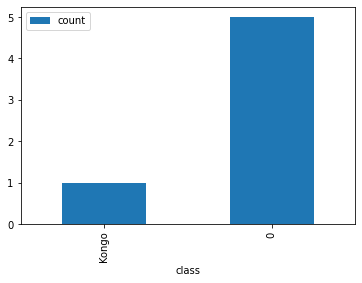

In [8]:
#task11
request = """
select cast(class as VARCHAR) , count
from sunk_ships_by_classes
"""
df = pd.read_sql_query(request, conn)
class_iloc = df.iloc[:,0].to_list()
count_iloc = df.iloc[:,1].to_list()
#fig = px.bar(x=class_iloc, y=count_iloc, labels={'x':'class', 'y':'count'})
#fig.show() ##модуль автоматически "проглатывает" 0, убирая вариант "Конго"
df.plot(kind='bar', x='class', y='count')

In [2]:
#task13
request = """
select country, count(class)
from classes
group by country
"""
df = pd.read_sql_query(request, conn)
country_iloc = df.iloc[:,0].to_list()
count_iloc = df.iloc[:,1].to_list()
fig = px.bar(x=country_iloc, y=count_iloc, labels={'x':'country', 'y':'count'})
fig.show() 


In [4]:
#task16
request = """
select launched, count(name)
from ships
group by launched
"""
df = pd.read_sql_query(request, conn)
launched_iloc = df.iloc[:,0].to_list()
count_iloc = df.iloc[:,1].to_list()
fig = px.bar(x=launched_iloc, y=count_iloc, labels={'x':'launched', 'y':'count'})
fig.show() 

In [ ]:
-схема БД: https://docs.google.com/document/d/1NVORWgdwlKepKq_b8SPRaSpraltxoMg2SIusTEN6mEQ/edit?usp=sharing
--colab/jupyter: https://colab.research.google.com/drive/1j4XdGIU__NYPVpv74vQa9HUOAkxsgUez?usp=sharing

--task13 (lesson3)
--Компьютерная фирма: Вывести список всех продуктов и производителя с указанием типа продукта (pc, printer, laptop). Вывести: model, maker, type

--task14 (lesson3)
--Компьютерная фирма: При выводе всех значений из таблицы printer дополнительно вывести для тех, у кого цена вышей средней PC - "1", у остальных - "0"

--task15 (lesson3)
--Корабли: Вывести список кораблей, у которых class отсутствует (IS NULL)

--task16 (lesson3)
--Корабли: Укажите сражения, которые произошли в годы, не совпадающие ни с одним из годов спуска кораблей на воду.

--task17 (lesson3)
--Корабли: Найдите сражения, в которых участвовали корабли класса Kongo из таблицы Ships.

--task1  (lesson4)
-- Компьютерная фирма: Сделать view (название all_products_flag_300) для всех товаров (pc, printer, laptop) с флагом, если стоимость больше > 300. Во view три колонки: model, price, flag

--task2  (lesson4)
-- Компьютерная фирма: Сделать view (название all_products_flag_avg_price) для всех товаров (pc, printer, laptop) с флагом, если стоимость больше cредней . Во view три колонки: model, price, flag

--task3  (lesson4)
-- Компьютерная фирма: Вывести все принтеры производителя = 'A' со стоимостью выше средней по принтерам производителя = 'D' и 'C'. Вывести model

--task4 (lesson4)
-- Компьютерная фирма: Вывести все товары производителя = 'A' со стоимостью выше средней по принтерам производителя = 'D' и 'C'. Вывести model

--task5 (lesson4)
-- Компьютерная фирма: Какая средняя цена среди уникальных продуктов производителя = 'A' (printer & laptop & pc)

--task6 (lesson4)
-- Компьютерная фирма: Сделать view с количеством товаров (название count_products_by_makers) по каждому производителю. Во view: maker, count

--task7 (lesson4)
-- По предыдущему view (count_products_by_makers) сделать график в colab (X: maker, y: count)

--task8 (lesson4)
-- Компьютерная фирма: Сделать копию таблицы printer (название printer_updated) и удалить из нее все принтеры производителя 'D'

--task9 (lesson4)
-- Компьютерная фирма: Сделать на базе таблицы (printer_updated) view с дополнительной колонкой производителя (название printer_updated_with_makers)

--task10 (lesson4)
-- Корабли: Сделать view c количеством потопленных кораблей и классом корабля (название sunk_ships_by_classes). Во view: count, class (если значения класса нет/IS NULL, то заменить на 0)

--task11 (lesson4)
-- Корабли: По предыдущему view (sunk_ships_by_classes) сделать график в colab (X: class, Y: count)

--task12 (lesson4)
-- Корабли: Сделать копию таблицы classes (название classes_with_flag) и добавить в нее flag: если количество орудий больше или равно 9 - то 1, иначе 0

--task13 (lesson4)
-- Корабли: Сделать график в colab по таблице classes с количеством классов по странам (X: country, Y: count)

--task14 (lesson4)
-- Корабли: Вернуть количество кораблей, у которых название начинается с буквы "O" или "M".

--task15 (lesson4)
-- Корабли: Вернуть количество кораблей, у которых название состоит из двух слов.

--task16 (lesson4)
-- Корабли: Построить график с количеством запущенных на воду кораблей и годом запуска (X: year, Y: count)
